# REDES NEURAIS ARTIFICIAIS

[Aula 3 de Deep Learning](http://bit.ly/dn-unb03) da Engenharia de Software da UnB

# Parte 1 - Pré-processamento dos Dados

### Importar as libs

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

2021-08-06 22:48:15.672970: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-08-06 22:48:15.673109: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
tf.__version__

'2.5.0'

### Importar o dataset

In [3]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values
print("X >>\n",X)
print("y >>\n",y)

X >>
 [[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]
y >>
 [1 0 1 ... 1 1 0]


### Transformando os dados categóricos


In [5]:
# Label Encoding the "Gender" column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])
print(X)
# One Hot Encoding the "Geography" column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]
[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


# Dividindo o dataset em conjunto de treinamento e conjunto de teste

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
np.shape(X_train)

(8000, 12)

---
# Parte 2 -Vamos construir uma ANN!


### Initializing the ANN

In [9]:
ann = tf.keras.models.Sequential()

2021-08-04 11:31:07.068708: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-08-04 11:31:07.393395: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-08-04 11:31:07.393457: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (heisson-Inspiron-7580): /proc/driver/nvidia/version does not exist
2021-08-04 11:31:07.395256: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Adding the input layer and the first hidden layer

In [10]:
ann.add(tf.keras.layers.Dense(units=6, activation='tanh'))

### Adding the second hidden layer

In [11]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [12]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the ANN

### Compiling the ANN

In [13]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Training the ANN on the Training set

In [14]:
ann.fit(X_train, y_train, batch_size=32, epochs=100)

2021-08-04 11:31:07.705711: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-08-04 11:31:07.706346: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 1800000000 Hz


Epoch 1/100
250/250 [==============================] - 0s 553us/step - loss: 0.6094 - accuracy: 0.6926
Epoch 2/100
250/250 [==============================] - 0s 552us/step - loss: 0.4688 - accuracy: 0.7959
Epoch 3/100
250/250 [==============================] - 0s 541us/step - loss: 0.4360 - accuracy: 0.7964
Epoch 4/100
250/250 [==============================] - 0s 539us/step - loss: 0.4252 - accuracy: 0.8008
Epoch 5/100
250/250 [==============================] - 0s 545us/step - loss: 0.4175 - accuracy: 0.8127
Epoch 6/100
250/250 [==============================] - 0s 536us/step - loss: 0.4083 - accuracy: 0.8199
Epoch 7/100
250/250 [==============================] - 0s 534us/step - loss: 0.3972 - accuracy: 0.8310
Epoch 8/100
250/250 [==============================] - 0s 541us/step - loss: 0.3854 - accuracy: 0.8382
Epoch 9/100
250/250 [==============================] - 0s 548us/step - loss: 0.3740 - accuracy: 0.8444
Epoch 10/100
250/250 [==============================] - 0s 601us/step - l

# Parte 3 - Fazendo predições e avaliando o modelo

## Prevendo os resultados com o conjunto de testes

In [15]:
y_pred = ann.predict(X_test)
y_pred

array([[0.36632925],
       [0.29400975],
       [0.13895285],
       ...,
       [0.20918283],
       [0.12852055],
       [0.291925  ]], dtype=float32)

In [16]:
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

# Criando uma Confusion Matrix

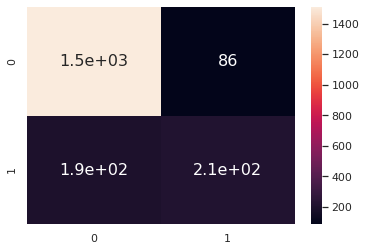

[[1509   86]
 [ 192  213]]


In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm)
sn.set(font_scale=1) 
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16})

plt.show()
print(cm)

# FIM

> Professor Diego Dorgam  
> [@diegodorgam](https://twitter.com/diegodorgam)